In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',as_frame=False)

In [ ]:
mnist.data.shape

(70000, 784)

In [ ]:
import numpy as np
print(mnist.feature_names)
print(np.unique(mnist.target))

['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pixel63', 'pixel64', 'pixel65', 'pixel66', 'pixel67', 'pixel68', 'pixel69', 'pixel70', 'pixel71', 'pixel72', 'pixel73', 'pixel74', 'pixel75', 'pixel76', 'pixel77', 'pixel78', 'pixel79', 'pixel80', 'pixel81', 'pixel82', 'pixel83', 'pixel84', 'pixel85', 'pixel86', 'pixel87', 'pixel88', 'pixel89', 'pixel90', 'pixel91', 'pixel9

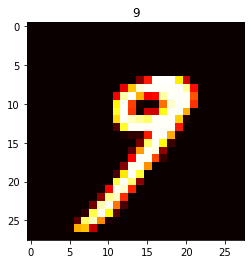

In [ ]:
import matplotlib.pyplot as plt
n = 33
image = mnist.data[n].reshape(28,28)
plt.imshow(image,cmap='hot')
#plt.imshow(image,'hot')
plt.title(mnist.target[n])
plt.show()

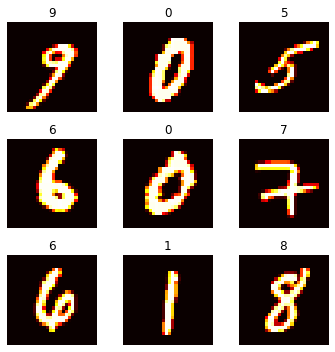

In [ ]:
plt.figure(figsize =(5,5))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(mnist.data[n+i].reshape(28,28),'hot')
  plt.title(mnist.target[n+i])
  plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(mnist.data,mnist.target,
                                                  test_size = 0.3,stratify = mnist.target)

In [ ]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(49000, 784) (21000, 784) (49000,) (21000,)


In [ ]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(200,50),
                      activation = 'relu',
                      solver = 'adam',
                      max_iter = 10,
                      verbose = 1)

In [ ]:
model.fit(x_train,y_train)

Iteration 1, loss = 2.35632057
Iteration 2, loss = 0.65083930
Iteration 3, loss = 0.44816858
Iteration 4, loss = 0.34598709
Iteration 5, loss = 0.27687974
Iteration 6, loss = 0.23548521
Iteration 7, loss = 0.21268792
Iteration 8, loss = 0.18564849
Iteration 9, loss = 0.17536106
Iteration 10, loss = 0.15354424


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(hidden_layer_sizes=(200, 50), max_iter=10, verbose=1)

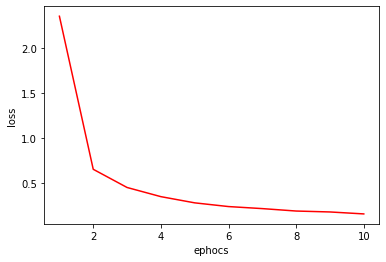

In [ ]:
loss_values = model.loss_curve_
line_x = np.arange(1,len(loss_values)+1)
plt.plot(line_x,loss_values,'r')
plt.xlabel('ephocs')
plt.ylabel('loss')
plt.show()

In [ ]:
print("Test set score: ",model.score(x_test,y_test))

Test set score:  0.9474285714285714
